## Изотермы газа Ван-дер-Ваальса

Уравнение газа Ван-дер-Ваальса отличается от уравнения идеального газа тем, что в нем учитываются две поправки: на конечный объем молекул - центры молекулы не могут приблизится друг к другу ближе, чем на расстояние, меньшее диаметра каждой молекулы; и на тот факт, что взаимодействуя между собой, молекулы уменьшают общее давление на стенку сосуда. Итак, уравнение имеет следующий вид:
\begin{equation}
P=\frac{RT}{V - b}-\frac{a}{V^{2}},
\end{equation}
Такое уравнение для каждого P имеет три действительных корня $\left(V_{1}, V_{2}, V_{3}\right)$. При некоторых критических значениях P, T, V три корня становятся одним и на графике вместо максимума и минимума возникает точка перегиба функции.
Перед тем как построить вид кривых P(V), обезразмерим величины в этом уравнении. Можно перейти к приведенному уравнению Ван-дер-Ваальса, поделив P, T, V на соответствующие им критические величины. Найдем эти величины с помощью условия равенства нулю второй производной. Уравнение первой производной имеет следующий вид:
\begin{equation}
P_{э}=\frac{a(V - 2b)}{V^{3}},
\end{equation}
Использовав уравнение Ван-дер-Ваальса мы исключили температуру из выражения для первой производной плотности по энергии. График этой функции - парабола, пересекающая серию изотерм в точках их максимумов и минимумов.
В точке максимума этой кривой находится критическая точка. Приравнивая вторую производную к нулю, получаем:

\begin{equation}
\dfrac{dP_{э}}{dV}=-\frac{2a}{V^{3}}+\frac{6ab}{V^{4}}=0,
\end{equation}

Совмещая все уравнения, находим критические параметры: 
\begin{equation}
V_{k} = 3b, P_{k} = \frac{a}{27b^{2}}, T_{k} = \frac{8a}{27bR}
\end{equation}

Перейдя к переменным уравнения, которые поделены на критические, получим приведенное уравнение Ван-дер-Ваальса, которое уже не зависит от значений поправок a и b:
\begin{equation}
\left(p+\frac{3}{v^{2}}\right)\left(v-\frac{1}{3}\right)=\frac{8t}{3}
\end{equation}
Приведенные уравнения состояния одинаковы для всех веществ
Снизу приведены графики этого уравнения P(V) при нескольких значениях T. Критическая изотерма будет проходить в данном случае через точку (1, 1).

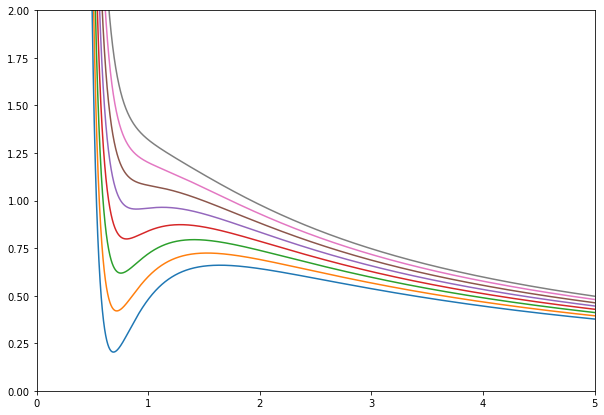

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10, 7))

v = np.arange(0.34, 10, 0.0001)

def p(v, T):
    return ((8 * T / (3 * v - 1)) - (3 / v**2))

T = 0.87
for y in range(8):
    plt.plot(v, p(v, T), '-')
    T += 0.03

plt.axis([0, 5, 0, 2])
plt.show()

Построим график первой производной - пунктирная линия фиолетового цвета. Она пересекает все изотермы в точках их максимумов и минимумов. Можно найти точки пересечения.

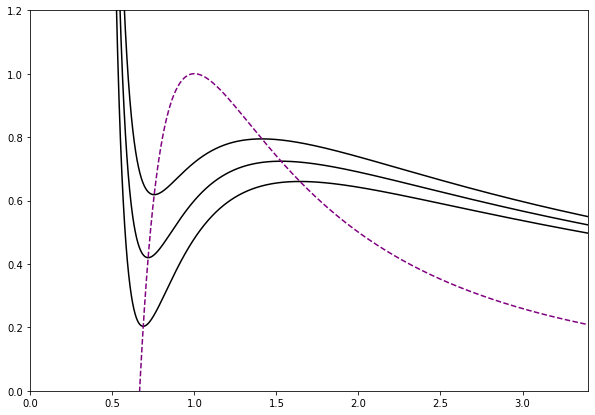

In [16]:
plt.figure(figsize=(10, 7))
def pro(v):
    return ((1/v**3) * (3*v - 2))
def raz(v, T):
    return p(v, T) - pro(v)
T = 0.87

for w in range(3):
    plt.plot(v, p(v, T), color='black', linestyle='-')
    T += 0.03


plt.plot(v, pro(v), color='purple', linestyle='--')
plt.axis([0, 3.4, 0, 1.2])
plt.show()

Построим функцию разности этих двух функций и найдем ее нули с помощью метода половинного деления - численного метода решения уравнения алгебраических уравнений. Эти нули будут искомым пересечением двух графиков. Результат выполнения программы - набор точек минимумов изотерм по оси V, которые подписаны Vmin и набор точек максимумов - Vmax

In [48]:
def dih(a, b, f, p):
    e = 0.0001
    while abs(b - a) > e:
        if f(a, p) * f(b, p) < 0:
            c = (a + b) / 2
        if f(a, p) * f(c, p) < 0:
            b = c
        else:
            a = c
            if abs(f(c, p)) < 0.0001:
                break
    return c
T = 0.87

#print(dih(0.55, 1, raz, T))
#print(dih(1, 3, raz, T))
Vmin = []
Vmax = []
Pmin = []
Pmax = []
for m in range(0, 3):
    Vmin.append(dih(0.51, 1, raz, T))
    Vmax.append(dih(1, 3, raz, T))
    Pmin.append(p(Vmin[m], T))
    Pmax.append(p(Vmax[m], T))
    T += 0.03
print('Vmin:', *Vmin, sep=', ')
print('Vmax:', *Vmax, sep=', ')

Vmin:, 0.6887854003906251, 0.7185729980468751, 0.7555981445312498
Vmax:, 1.6435546875, 1.5284423828125, 1.41162109375


### Теоретическое введение. Обоснование существования двухфазной области
Теперь исследуем область сосуществования фаз. 
Для реализации в действительности уравнения Ван-дер-Ваальса, необходимо чтобы вещества, отвечающие этому уравнению и подобным были термодинамически устойчивы. Условие термодинамической устойчивости имеет вид:
\begin{equation}
\left(\frac{\partial P}{\partial V}\right)_{T}< 0,
\end{equation}

Физически оно означает, что при изотермическом увеличении давления объем тела должен изменяться монотонна. То есть в реальности участки с максимумами и минимумами графика должны отбрасываться - остануться две ветви. Эти ветви описывают жидкость и газ. Положение точек при фазовом переходе можно определить исходя из конструкции Максвелла.

Проведем константу давления и увидим, что фазовый переход можно осуществить двумя изотермическими процессами. По прямой изобары и кривой изотермы. Возьмем и проведем цикл, прямой переход от газа к жидкости будет происходить, например, по прямой, а обратный по кривой. Работа этого цикла равна разности площадей. Температура во время цикла неизменна, значит работа цикла при неизменности температуры равна нулю. Значит площади обоих кривых, ограниченных изобарой должны быть равны.
Площадь прямоугольника под изобарой равна площади кривых ею огранниченных. Значит кривую надо провести так, чтобы равнялись площади кривых.

Область под кривой (кривая - геометрическое место точек давления, при котором равны указанные площади) является областью сосуществования двух фаз. Каждая точка этой области изображает такое состояние вещества, в котором оно не является физически однородным, а состоит из жидкости и ее насыщенного пара.
Точки под кривой могут изображать и однофазные состояния, которым соответствуют теоретические изотермы, имеющие волнообразный характер. Это метастабильные состояния - перегретая жидкость и пересыщенный пар. И неустойчивые состояния, которым соответствуют поднимающиеся участки теоретических изотерм. Такие состояния могут играть роль только в теоретических рассуждениях

### Алгоритм программы поиска изобары
Беря каждую из изотерм, будем проводить константу давления в некоторой начальной точке, немного отличной от ее минимума. Далее будем изменять давление с некоторым шагом, каждый раз считая эти два интеграла численно и проверяя их равенство с заданной точностью. Опять же используем перед этим метод дихотомии для поиска точек пересечения прямой, отвечающей давлению с кривой изотермы - это будут границы интегрирования на каждом шаге.

Для поиска площадей используем метод численного интегрирования средних прямоугольников. Он описывается функцией integ. Изменение изотерм и поиск соответствующих пределов интегрирования и самих интегралов осуществляется с помощью функции integrals, которая зависит от начальной изобары для каждой температуры T.

Программа выводит в первой строке численные значения найденных изобар. Во второй строке тройку чисел на каждую изотерму - это точки пересечения изобары по координате V.

In [49]:
def Pi(v, p0, T):
    return (((8 * T) / (3 * v - 1)) - (3 / v**2) - p0)

def dih(a, b, f, p, T):
    e = 0.001
    while abs(b - a) > e:
        if f(a, p, T) * f(b, p, T) < 0:
            c = (a + b) / 2
        if f(a, p, T) * f(c, p, T) < 0:
            b = c
        else:
            a = c
            if abs(f(c, p, T)) < 0.001:
                break
    return c

def integ(a, b, f, p0, T):
    n = 10000
    h = (b - a) / n
    v = 0
    for i in range(n + 1):
        x = a + i * h
        v = v + f(x + (h/2), p0, T)
    return v * h


def integrals(p0, T):
    """..."""
    int1 = []
    int2 = []
    pr = []
    vv = []
    for g in range(3):
        int_1 = 0
        int_2 = 4
        u = 0
        while abs(int_1 - int_2) > 0.001:
            u = u + 1
            p0 = p0 + 0.0001
            V1 = dih(0.55, Vmin[g], Pi, p0, T)
            V2 = dih(Vmin[g], Vmax[g], Pi, p0, T)
            V3 = dih(Vmax[g], 6, Pi, p0, T)
            int_1 = - integ(V1, V2, Pi, p0, T)
            int_2 = integ(V2, V3, Pi, p0, T)
        T += 0.03
        int1.append(int_1)
        int2.append(int_2)
        vv.append((V1, V2, V3))
        pr.append(p0)
    return int1, int2, pr, vv

tup = integrals(0.35, 0.87)
pres = tup[2]
vv = tup[3]
print(pres)
print(vv)

[0.558499999999977, 0.6464999999999673, 0.7424999999999568]
[(0.5711430883407593, 1.1214152336120606, 2.792226791381836), (0.6033375501632691, 1.0887086153030396, 2.3493924140930176), (0.6455710124969481, 1.0579837226867674, 1.967245101928711)]


Округлим полученные значения для изобар

In [50]:
for u in range(0, len(pres)):
    pres[u] = int(pres[u] * 1000) / 1000
print(pres)

[0.558, 0.646, 0.742]


Для примера ниже приведены графики нескольких изотерм и найденных площадей для каждой из них. Площади закрашены светло-красным цветом. Черным цветом построена критическая изотерма.

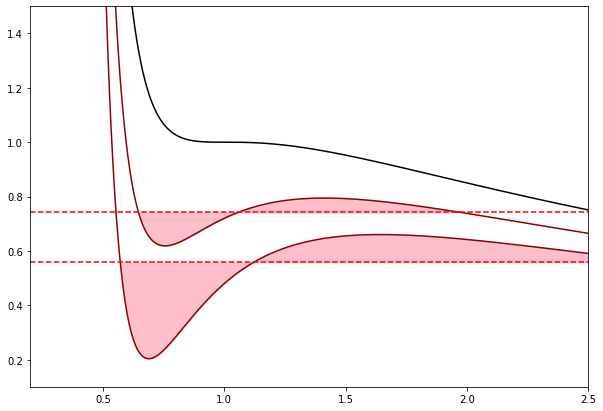

In [51]:
plt.figure(figsize=(10, 7))
def pp(v): # критическая изотерма
    return ((8 / (3 * v - 1)) - 3 / v**2)
def p(v, T):
    return ((8 * T / (3 * v - 1)) - (3 / v**2))


plt.plot(v, p(v, 0.87), color='darkred', linestyle='-')
plt.plot(v, p(v, 0.93), color='darkred', linestyle='-')

plt.plot(v, pp(v), color='black', linestyle='-')

plt.axhline(y=pres[0], color='r', linestyle='--')
plt.axhline(y=pres[2], color='r', linestyle='--')

ar = np.arange(vv[0][0], vv[0][2], 0.01)
plt.fill_between(ar, p(ar, 0.87), pres[0], color='pink')
ar = np.arange(vv[2][0], vv[2][2], 0.01)
plt.fill_between(ar, p(ar, 0.93), pres[2], color='pink')


plt.axis([0.2, 2.5, 0.1, 1.5])
plt.show()

Закрасим двухфазные области в соответствии с геометрическим местом точек пересечения изобар и изотерм. Если начиная с оранжевой области у нас были бы прямые, мы могли бы сказать что эта область отвечает термодинамическому равновесию. Кривые Ван-дер-Ваальса же в оранжевой области метастабильны и неустойчивы в фиолетовой

[0.5711430883407593, 0.6033375501632691, 0.6455710124969481, 1, 1.967245101928711, 2.3493924140930176, 2.792226791381836]
[0.558, 0.646, 0.742, 1, 0.742, 0.646, 0.558]


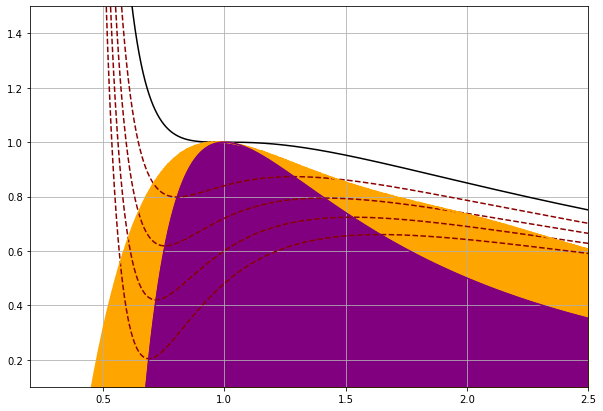

In [54]:
plt.figure(figsize=(10, 7))
l = 1
x = []
y = []
for h in range(3):
    y.append(pres[h])
    x.append(vv[h][0])

y.append(l)
x.append(l)

for h in range(2, -1, -1):
    y.append(pres[h])
    x.append(vv[h][2])

print(x)
print(y)
vx = np.arange(0.4, 2.63, 0.001)
sp = []
s = 0

for k in range(len(vx)):
    s = 0
    for i in range(7):
        p = 1
        for j in range(7):
            if j != i:
                p = p * (vx[k] - x[j]) / (x[i] - x[j])
        s = s + (int(p * y[i] * 1000) / 1000)
    sp.append(s)



plt.plot(v, pp(v), color='black', linestyle='-')
def p(v, T):
    return ((8 * T / (3 * v - 1)) - (3 / v**2))


plt.plot(v, p(v, 0.87), color='darkred', linestyle='--')
plt.plot(v, p(v, 0.90), color='darkred', linestyle='--')
plt.plot(v, p(v, 0.93), color='darkred', linestyle='--')
plt.plot(v, p(v, 0.96), color='darkred', linestyle='--')
plt.plot(vx, sp, color='orange')
plt.plot(v, pro(v), color='purple', linestyle='-')
plt.fill_between(vx, sp, color='orange')
plt.fill_between(v, pro(v), color='purple')

plt.axis([0.2, 2.5, 0.1, 1.5])

plt.grid()
plt.show()

